# Formula 1 Analysis

## importing libraries

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading all the datasets into dataframe

In [3]:
circuits_df = pd.read_csv('circuits.csv')
constructor_results_df = pd.read_csv('constructor_results.csv')
constructor_standings_df = pd.read_csv('constructor_standings.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
lap_times_df = pd.read_csv('lap_times.csv')
pit_stops_df = pd.read_csv('pit_stops.csv')
qualifying_df = pd.read_csv('qualifying.csv')
sprint_results_df = pd.read_csv('sprint_results.csv')
status_df = pd.read_csv('status.csv')
drivers_df = pd.read_csv('drivers.csv')
constructors_df = pd.read_csv('constructors.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
seasons_df= pd.read_csv('seasons.csv')


In [83]:
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [84]:
constructor_results_df.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [85]:
constructor_standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [89]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [92]:
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


## Merging multiple dataframes to get all the related field in one frame for further analysis

In [155]:
constructors_result_refined = pd.merge(constructor_results_df,constructors_df,on="constructorId")
constructors_result_refined = constructors_result_refined.merge(races_df,on="raceId")
constructors_result_refined = constructors_result_refined.drop(["status","url_x","time","url_y"],axis=1)
constructors_result_refined = constructors_result_refined.rename(columns={"name_x":"Constructor_name","name_y":"constructor_name"})

constructor_standings_refined = constructor_standings_df.merge(races_df,on="raceId")
constructor_standings_refined = constructor_standings_refined.merge(constructors_df,on="constructorId")
constructor_standings_refined = constructor_standings_refined.drop(["positionText","url_y","time","url_x","nationality"],axis=1)
constructor_standings_refined = constructor_standings_refined.rename(columns={"name_x":"circuit_name","name_y":"constructor_name"})

driver_standings_refined = driver_standings_df.merge(drivers_df,on="driverId")
driver_standings_refined = driver_standings_refined.merge(races_df,on="raceId")
driver_standings_refined = driver_standings_refined.drop(["positionText","dob","url_x","time","number","url_y"],axis=1)

lap_times_refined = lap_times_df.merge(drivers_df,on="driverId").drop("url",axis=1)

qualifying_refined = qualifying_df.merge(races_df,on="raceId")
qualifying_refined = qualifying_refined.merge(drivers_df,on="driverId")
qualifying_refined = qualifying_refined.merge(constructors_df,on="constructorId")
qualifying_refined = qualifying_refined.drop(["number_x","url_x","dob","nationality_x","url_y","nationality_y","url"],axis=1)
qualifying_refined = qualifying_refined.rename(columns={"name_x":"circuit_name","number_y":"driver_num","name_y":"constructor_id"})

race_result_refined = results_df.merge(races_df,on="raceId")
race_result_refined = race_result_refined.merge(drivers_df,on="driverId")
race_result_refined = race_result_refined.merge(constructors_df,on="constructorId")
race_result_refined = race_result_refined.drop(["number_x","positionText","url_x","url_y","url","nationality_y","nationality_x","dob","time_y"],axis=1)
race_result_refined = race_result_refined.rename(columns={"time_x":"time","name_x":"circuit_name","number_y":"driver_num","name_y":"constructor_name"})

pit_stops_refined = pit_stops_df.merge(race_result_refined,on=["raceId","driverId"])
pit_stops_refined = pit_stops_refined.drop(["driverId","resultId","points","time_y","milliseconds_y","fastestLap","rank","fastestLapTime","fastestLapSpeed"],axis=1)
pit_stops_refined = pit_stops_refined.rename(columns={"time_x":"time","milliseconds_x":"milliseconds"})


## Drivers and Constructor Performance over time

In [48]:
# Merge the datasets
merged_df = results_df.merge(races_df, on='raceId').merge(drivers_df, on='driverId').merge(constructors_df, on='constructorId')

# get latest 7 season
merged_df = merged_df.sort_values(by='year', ascending=False)
last_7_seasons = merged_df['year'].unique()[:7]


recent_df = merged_df[merged_df['year'].isin(last_7_seasons)]

# Calculate total points for drivers and constructors for the last 5 seasons
driver_points = recent_df.groupby(['year', 'driverRef'])['points'].sum().reset_index()
constructor_points = recent_df.groupby(['year', 'constructorRef'])['points'].sum().reset_index()

# Identify top 5 performers based on total points over the last 5 seasons
top_drivers = driver_points.groupby('driverRef')['points'].sum().nlargest(5).index
top_constructors = constructor_points.groupby('constructorRef')['points'].sum().nlargest(5).index


In [49]:
last_7_seasons

array([2023, 2022, 2021, 2020, 2019, 2018, 2017])

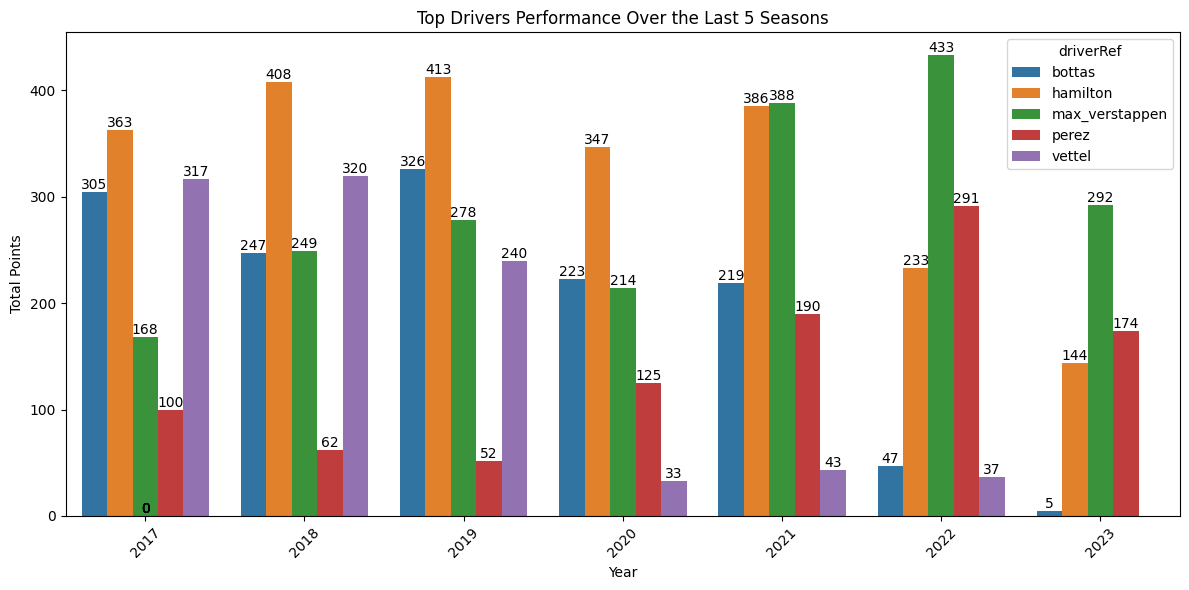

In [50]:
plt.figure(figsize=(12, 6))

# Create the barplot
ax = sns.barplot(x='year', y='points', hue='driverRef', data=driver_points[driver_points['driverRef'].isin(top_drivers)])
plt.title('Top Drivers Performance Over the Last 5 Seasons')
plt.ylabel('Total Points')
plt.xlabel('Year')
plt.xticks(rotation=45) 

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Lewis Hamilton has maintained remarkable consistency in his performance over the years until 2021
- Max Verstappen's performance has shown significant progress over the years. He earned 168 points in 2017 and consistently increased his points, reaching a peak of 433 points in 2022.
- 2021 and 2022 appear to be particularly competitive seasons
- The rivalry between Lewis Hamilton and Max Verstappen is evident, as they consistently compete for the top position in points

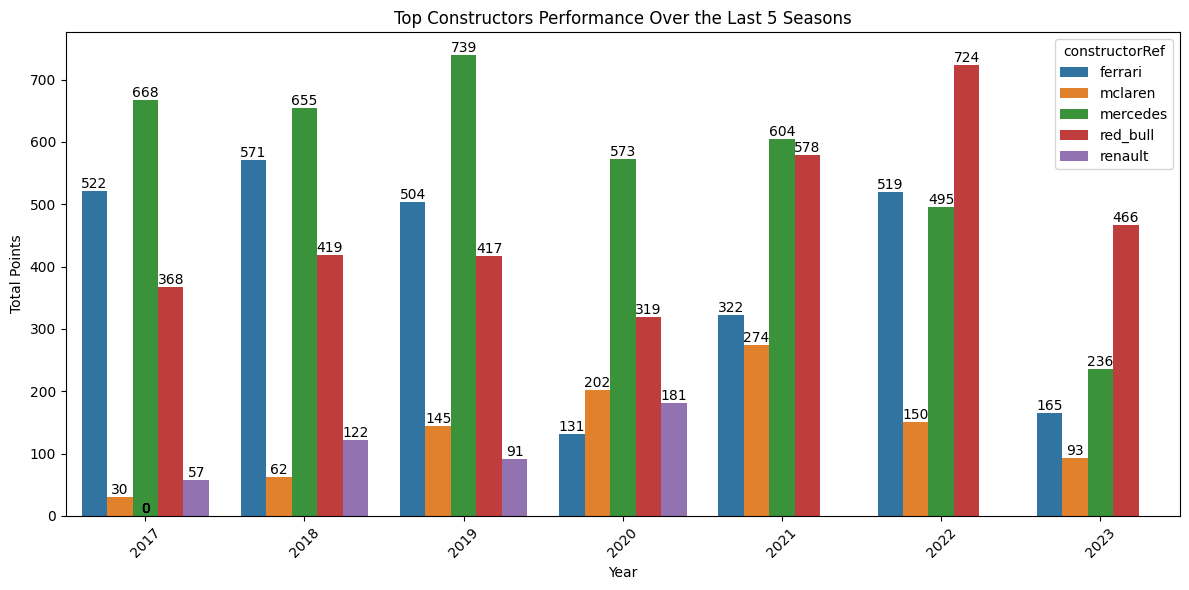

In [51]:
plt.figure(figsize=(12, 6))


ax = sns.barplot(x='year', y='points', hue='constructorRef', data=constructor_points[constructor_points['constructorRef'].isin(top_constructors)])
plt.title('Top Constructors Performance Over the Last 5 Seasons')
plt.ylabel('Total Points')
plt.xlabel('Year')
plt.xticks(rotation=45)  


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Mercedes stands out as one of the dominant constructor teams over the years, consistently earning a high number of points. They achieved the highest points total in 2017, 2018, 2019, 2020, and 2021.
- Ferrari had a competitive season in 2017, earning 522 points, but their points declined in subsequent years
- Red Bull has consistently been a competitive team, with substantial points earned in each season. They had their best performance in 2022, with 724 points.
- A rivalry between Mercedes and Red Bull is evident, as they consistently compete for the top position in points among constructor teams.

## Circuits favouring drivers and constructors

In [102]:

# circuits active in the last 2 seasons
recent_circuits = races_df[races_df['year'] >= races_df['year'].max() - 1]['circuitId'].unique()

# Filter the merged data for these circuits and for the last 5 years
recent_circuit_data = circuit_results[
    (circuit_results['circuitId'].isin(recent_circuits)) & 
    (circuit_results['year'] >= circuit_results['year'].max() - 5)
]

# driver and team with the most points in each of these circuits in the last 5 years
top_driver_per_circuit = recent_circuit_data.groupby(['circuitRef', 'driverId'])['points'].sum().reset_index()
top_driver_per_circuit = top_driver_per_circuit.loc[top_driver_per_circuit.groupby('circuitRef')['points'].idxmax()]

top_constructor_per_circuit = recent_circuit_data.groupby(['circuitRef', 'constructorId'])['points'].sum().reset_index()
top_constructor_per_circuit = top_constructor_per_circuit.loc[top_constructor_per_circuit.groupby('circuitRef')['points'].idxmax()]

# Merging driver and constructor names
top_driver_per_circuit = top_driver_per_circuit.merge(drivers_df, on='driverId')
top_constructor_per_circuit = top_constructor_per_circuit.merge(constructors_df, on='constructorId')

# Selecting relevant columns
top_driver_per_circuit = top_driver_per_circuit[['circuitRef', 'surname', 'points']]
top_constructor_per_circuit = top_constructor_per_circuit[['circuitRef', 'name', 'points']]



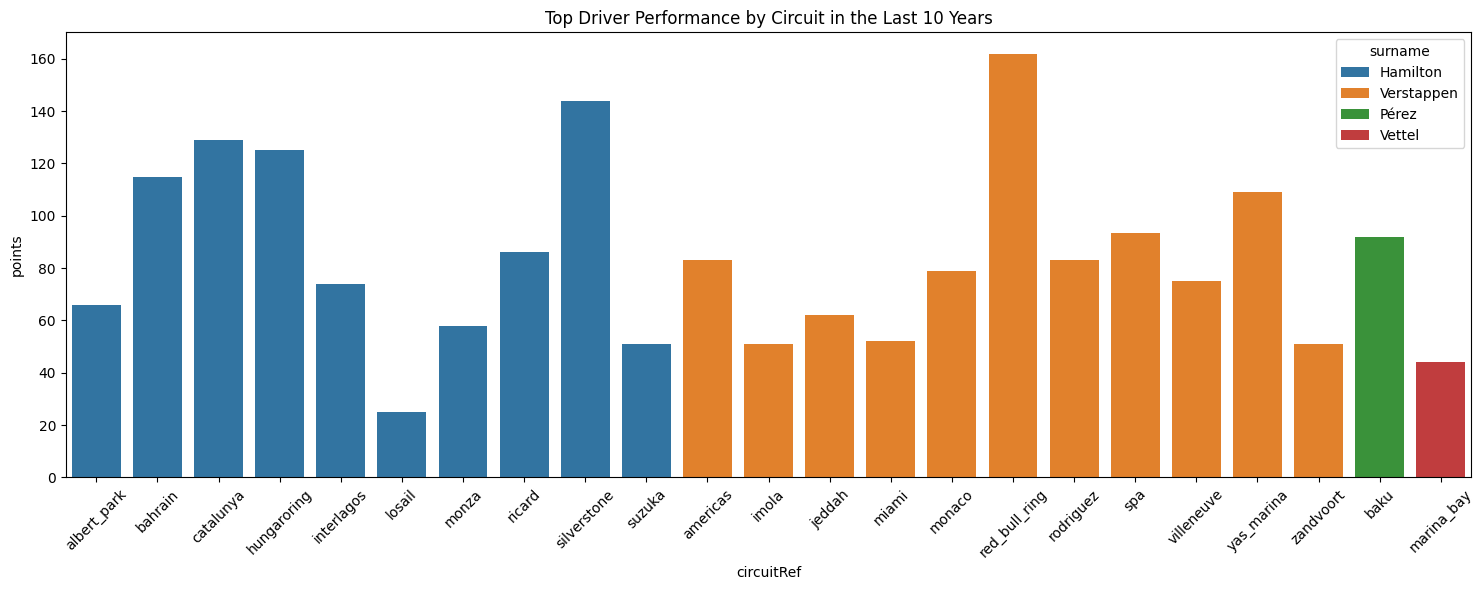

In [103]:
# Plotting driver performance by circuit
plt.figure(figsize=(15, 6))
sns.barplot(x='circuitRef', y='points', hue='surname', data=top_driver_per_circuit)
plt.title('Top Driver Performance by Circuit in the Last 5 Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Driver Insights**
- Max Verstappen has been the top performer in 11 circuits.
- Lewis Hamilton follows closely, being the top performer in 10 circuits.
- Sebastian Vettel and Sergio Pérez each have been the top performer in 1 circuit.

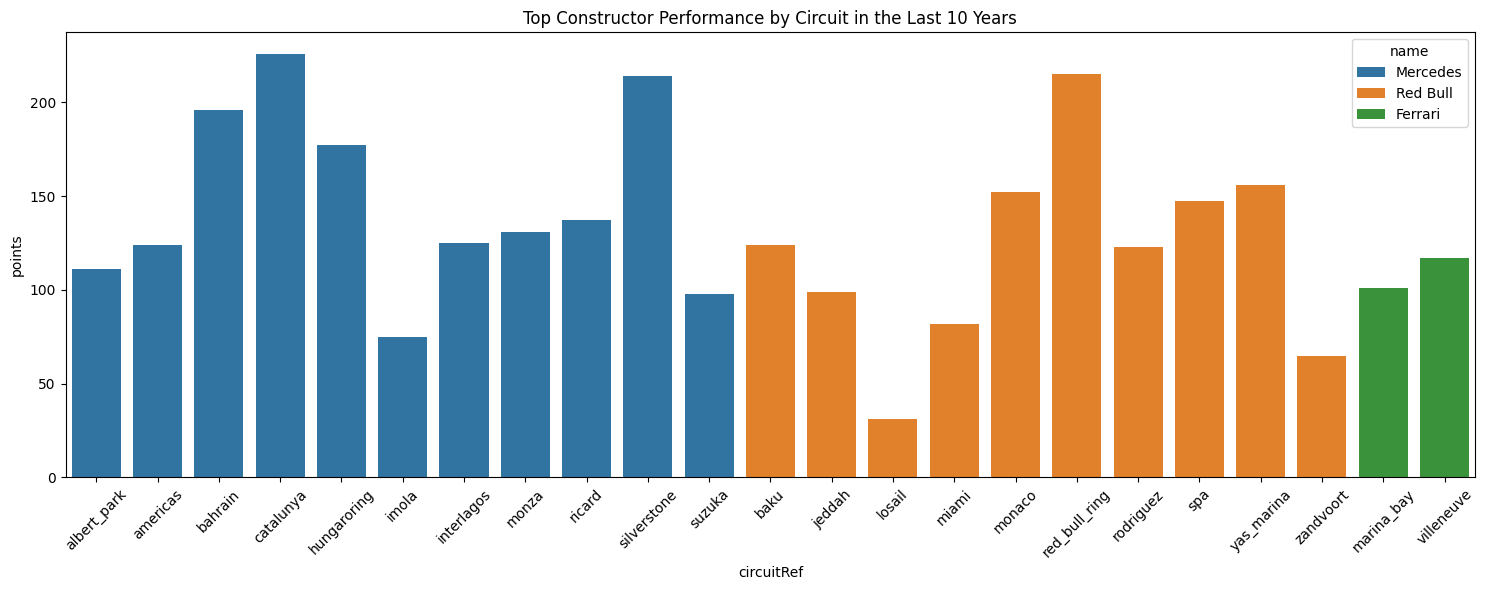

In [104]:
# Plotting constructor performance by circuit
plt.figure(figsize=(15, 6))
sns.barplot(x='circuitRef', y='points', hue='name', data=top_constructor_per_circuit)
plt.title('Top Constructor Performance by Circuit in the Last 5 Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Constructor Insights**
- Mercedes leads significantly, being the top constructor in 11 circuits.
- Red Bull is a close second with top performances in 10 circuits.
- Ferrari has been the top constructor in 2 circuits.

## Effect of qualifying on Race results

In [110]:
# Merge qualifying data with race results
qualifying_race_results = qualifying_df.merge(results_df, on=['raceId', 'driverId'])

# Correlation Analysis: Correlation between qualifying position and final position
qualifying_race_results['positionOrder'] = pd.to_numeric(qualifying_race_results['positionOrder'], errors='coerce')
qualifying_race_results['grid'] = pd.to_numeric(qualifying_race_results['grid'], errors='coerce')
correlation = qualifying_race_results[['grid', 'positionOrder']].corr(method='spearman')

# Track-Based Analysis: Average qualifying position per circuit
track_qualifying_performance = qualifying_race_results.merge(races_df, on='raceId')
average_qualifying_position = track_qualifying_performance.groupby('circuitId')['grid'].mean().reset_index()

# Merging circuit names
average_qualifying_position = average_qualifying_position.merge(circuits_df, on='circuitId')

average_qualifying_position.head(), correlation

(   circuitId       grid   circuitRef                            name   
 0          1  10.852941  albert_park  Albert Park Grand Prix Circuit  \
 1          2  11.330435       sepang    Sepang International Circuit   
 2          3  10.995227      bahrain   Bahrain International Circuit   
 3          4  11.252336    catalunya  Circuit de Barcelona-Catalunya   
 4          5  10.963351     istanbul                   Istanbul Park   
 
        location    country       lat        lng  alt   
 0     Melbourne  Australia -37.84970  144.96800   10  \
 1  Kuala Lumpur   Malaysia   2.76083  101.73800   18   
 2        Sakhir    Bahrain  26.03250   50.51060    7   
 3      Montmeló      Spain  41.57000    2.26111  109   
 4      Istanbul     Turkey  40.95170   29.40500  130   
 
                                                  url  
 0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
 1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
 2  http://en.wikipedia.org/wiki/Bahrain_Interna

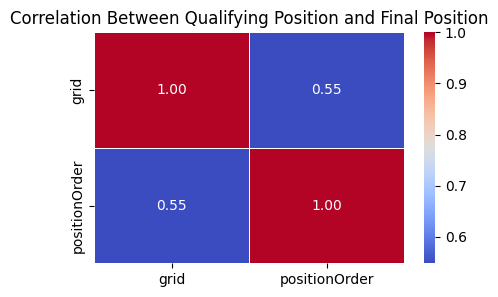

In [123]:
# Plot 1: Heatmap for Correlation Analysis
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Qualifying Position and Final Position')
plt.show()


There is a moderate positive correlation (approximately 0.55) between the qualifying position (grid) and the final race position (positionOrder). This suggests that a better qualifying position is generally associated with a better race outcome, but it's not a strong determinant on its own.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge qualifying data with race results
qualifying_race_results = qualifying_df.merge(results_df, on=['raceId', 'driverId'])

# Convert data types to numeric
qualifying_race_results['positionOrder'] = pd.to_numeric(qualifying_race_results['positionOrder'], errors='coerce')
qualifying_race_results['grid'] = pd.to_numeric(qualifying_race_results['grid'], errors='coerce')

# Calculate the probability of winning based on grid position
grid_position_counts = qualifying_race_results['grid'].value_counts().sort_index()
win_counts = qualifying_race_results[qualifying_race_results['positionOrder'] == 1]['grid'].value_counts().sort_index()
win_probability = win_counts / grid_position_counts



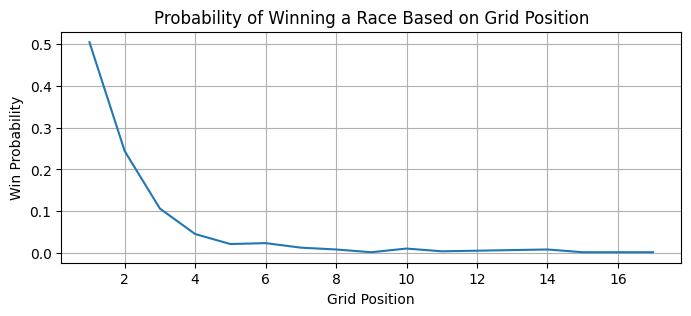

In [125]:
# Plot the probability of winning based on grid position
plt.figure(figsize=(8, 3))
sns.lineplot(x=win_probability.index, y=win_probability.values)
plt.title('Probability of Winning a Race Based on Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()

Higher the qualifying position better is the chances of winning the race

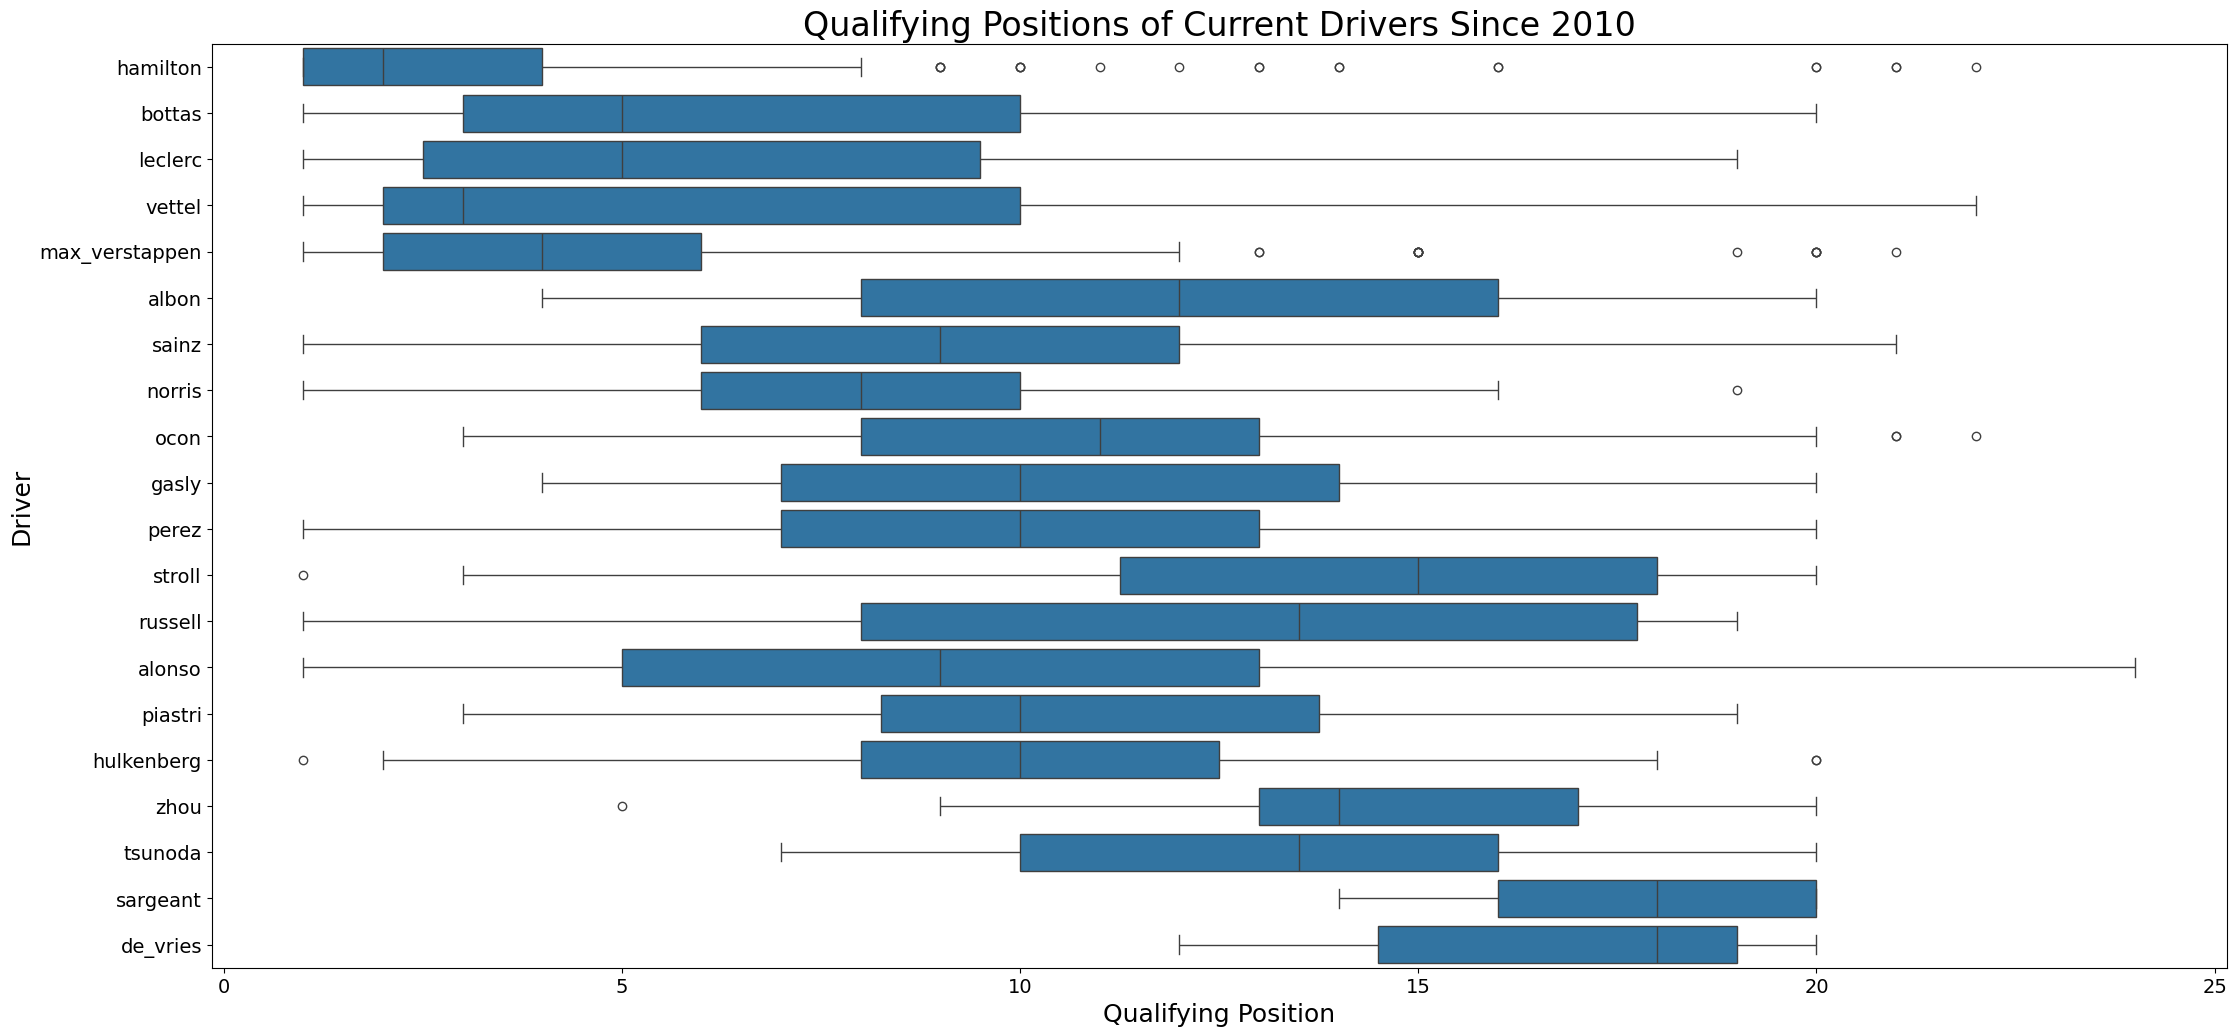

In [165]:

current_drivers = ["hamilton", "bottas", "leclerc", "vettel", "max_verstappen", 
                   "albon", "sainz", "norris", "ocon", "gasly", "perez", "stroll", 
                   "magnussen", "russell", "alonso", "piastri", "hulkenberg", 
                   "zhou", "tsunoda", "sargeant", "de_vries"]

current_qualifying_df = pd.concat([qualifying_refined[qualifying_refined.driverRef == driver] for driver in current_drivers])

# Filter for years >= 2010
current_qualifying_df = current_qualifying_df[current_qualifying_df.year >= 2010]

plt.figure(figsize=(26, 12))
sns.boxplot(data=current_qualifying_df, x="position", y="driverRef")
plt.title("Qualifying Positions of Current Drivers Since 2010", fontsize=24)
plt.xlabel("Qualifying Position", fontsize=18)
plt.ylabel("Driver", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

lewis hamilton is most successfull in putting his car at pole position followed by Max verstrappen

## Effect of pit stop strategy on Race

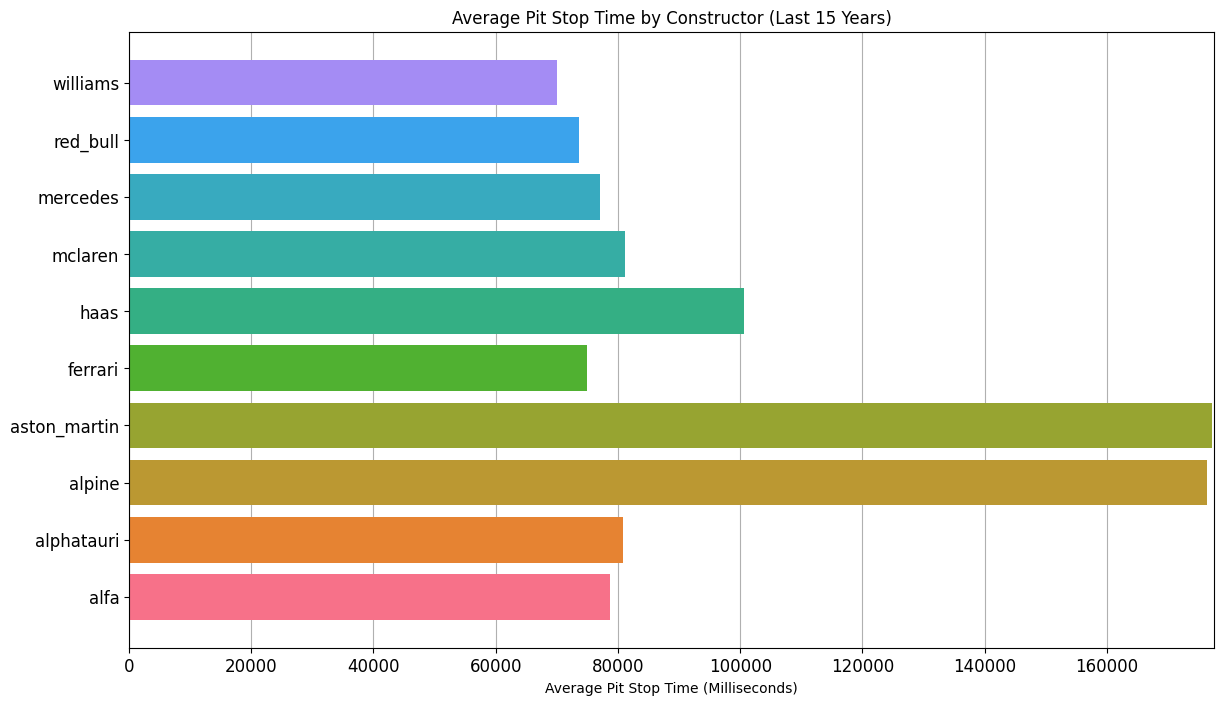

In [176]:
current_constructors = ["williams", "mclaren", "mercedes", "ferrari", "toro_rosso", "alphatauri", "haas", "red_bull", "sauber", "alfa", "alpine", "aston_martin"]

# Calculate the start year for the last 15 years
start_year = np.max(pit_stops_refined['year']) - 15

# Create a boolean mask to filter only the rows with constructors in `current_constructors` and within the last 15 years
mask = (pit_stops_refined['constructorRef'].isin(current_constructors)) & (pit_stops_refined['year'] >= start_year)
current_pitstop_df = pit_stops_refined[mask].copy()

# Rename the constructor names as necessary
current_pitstop_df['constructorRef'] = current_pitstop_df['constructorRef'].replace({
    'sauber': 'alfa',
    'toro_rosso': 'alphatauri'
})

# Calculate the average pit stop time for each constructor
avg_pitstop_times = current_pitstop_df.groupby('constructorRef')['milliseconds'].mean()

# Create a custom color palette
colors = sns.color_palette('husl', len(current_constructors))

# Create a horizontal bar chart of the average pit stop times
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(avg_pitstop_times.index, avg_pitstop_times.values, color=colors)

# Add labels and formatting to the plot
ax.set_title('Average Pit Stop Time by Constructor (Last 15 Years)')
ax.set_xlabel('Average Pit Stop Time (Milliseconds)')
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(0, np.ceil(avg_pitstop_times.max() / 500) * 500)

plt.show()

From the plot we can see that high performing teams have lower pit stop times

In [126]:
pit_stop_metrics = pit_stops_df.groupby(['raceId', 'driverId']).agg({'milliseconds': 'sum', 'stop': 'count'}).reset_index()
pit_stop_metrics.rename(columns={'milliseconds': 'totalPitTime', 'stop': 'numberOfStops'}, inplace=True)

# Merge with race and driver information for more context
pit_stop_metrics = pit_stop_metrics.merge(races_df, on='raceId').merge(drivers_df, on='driverId')

# Comparing Pit Stop Times and Number of Stops with Race Results
pit_stop_race_comparison = pit_stop_metrics.merge(results_df[['raceId', 'driverId', 'positionOrder']], on=['raceId', 'driverId'])

# Calculate correlation between pit stop metrics and race results
correlation_pit_stop = pit_stop_race_comparison[['totalPitTime', 'numberOfStops', 'positionOrder']].corr(method='spearman')

# Analysis
pit_stop_metrics.head(), correlation_pit_stop

(   raceId  driverId  totalPitTime  numberOfStops  year  round  circuitId   
 0     841         1         46426              2  2011      1          1  \
 1     842         1         93011              4  2011      2          2   
 2     843         1         61978              3  2011      3         17   
 3     844         1         99637              4  2011      4          5   
 4     845         1         81457              4  2011      5          4   
 
                     name        date      time  ... sprint_date sprint_time   
 0  Australian Grand Prix  2011-03-27  06:00:00  ...          \N          \N  \
 1   Malaysian Grand Prix  2011-04-10  08:00:00  ...          \N          \N   
 2     Chinese Grand Prix  2011-04-17  07:00:00  ...          \N          \N   
 3     Turkish Grand Prix  2011-05-08  12:00:00  ...          \N          \N   
 4     Spanish Grand Prix  2011-05-22  12:00:00  ...          \N          \N   
 
   driverRef number code forename   surname         do

In [129]:
# Merge lap times with pit stops data
pit_stop_lap_times = pit_stops_df.merge(lap_times_df, on=['raceId', 'driverId', 'lap'], how='left')

# Determine positions before and after pit stops
# Position before the pit stop is the position at the lap of the pit stop
# Position after the pit stop is the position at the next lap
pit_stop_lap_times['positionBefore'] = pit_stop_lap_times['position']
pit_stop_lap_times['positionAfter'] = pit_stop_lap_times.groupby(['raceId', 'driverId'])['position'].shift(-1)

# Dropping NaN values that occur for the last pit stop of a race where the next lap position is not available
pit_stop_lap_times.dropna(subset=['positionAfter'], inplace=True)

# Calculate the change in position
pit_stop_lap_times['positionChange'] = pit_stop_lap_times['positionAfter'] - pit_stop_lap_times['positionBefore']

# Aggregate analysis
position_change_summary = pit_stop_lap_times.groupby('driverId')['positionChange'].agg(['mean', 'median', 'count']).reset_index()

# Merge with driver names for readability
position_change_summary = position_change_summary.merge(drivers_df[['driverId', 'surname']], on='driverId')

position_change_summary.head()

,driverId,mean,median,count,surname
0,1,-0.212851,0.0,249,Hamilton
1,2,-0.466667,-1.0,15,Heidfeld
2,3,-0.007246,0.0,138,Rosberg
3,4,-0.171429,0.0,210,Alonso
4,5,0.288136,0.0,59,Kovalainen


In [130]:
# Filtering the position change summary for Lewis Hamilton and Max Verstappen
hamilton_verstappen_filter = position_change_summary['surname'].isin(['Hamilton', 'Verstappen'])
hamilton_verstappen_summary = position_change_summary[hamilton_verstappen_filter]

hamilton_verstappen_summary

,driverId,mean,median,count,surname
0,1,-0.212851,0.0,249,Hamilton
43,830,-0.311688,0.0,154,Verstappen


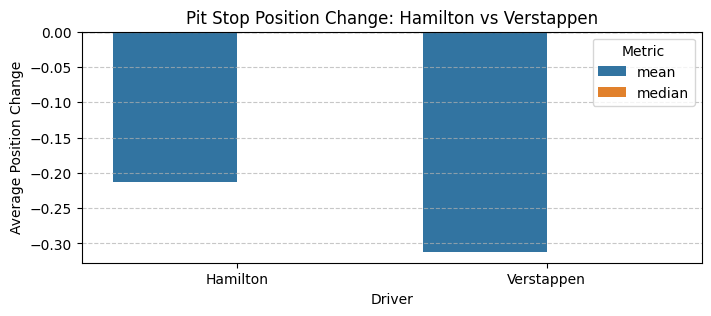

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation for plot
plot_data = hamilton_verstappen_summary[['surname', 'mean', 'median']]
plot_data = plot_data.melt(id_vars='surname', value_vars=['mean', 'median'])

# Plotting
plt.figure(figsize=(8, 3))
sns.barplot(x='surname', y='value', hue='variable', data=plot_data)
plt.title('Pit Stop Position Change: Hamilton vs Verstappen')
plt.ylabel('Average Position Change')
plt.xlabel('Driver')
plt.axhline(0, color='gray', lw=1, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.show()

it's evident that both drivers, on average, tend to lose positions after pit stops, with Verstappen experiencing a slightly higher average loss compared to Hamilton. However, the median values at zero for both drivers suggest that they often maintain their position post pit stops

## Trajectory of Driver and Constructor Performance over last 10 years

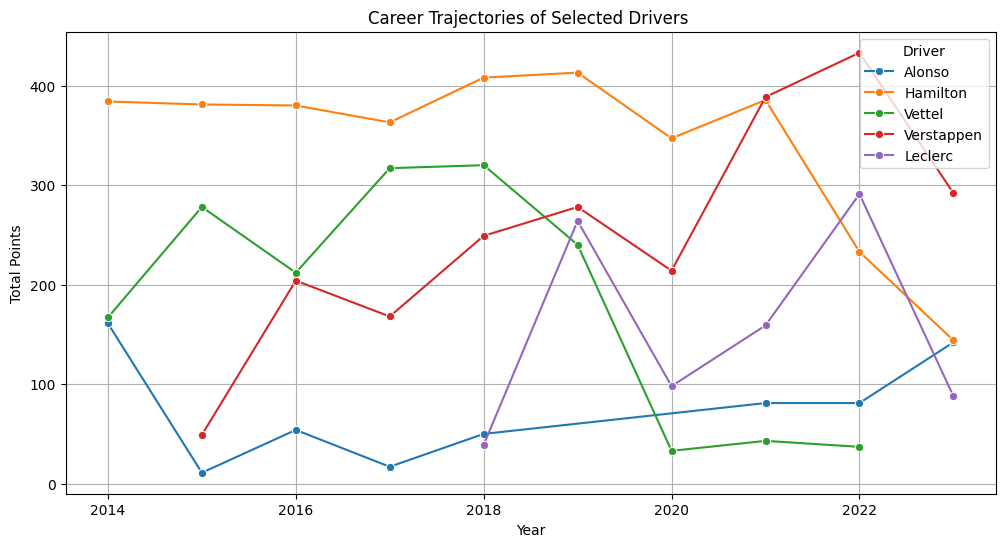

In [162]:

# Selecting a few drivers for career trajectory analysis
selected_drivers = ['Hamilton', 'Verstappen', 'Vettel', 'Alonso', 'Leclerc']
selected_constructors=['ferrari','mclaren','mercedes','red_bull']

# Filter results for selected drivers and group by year
driver_career_data = results_df.merge(drivers_df, on='driverId').merge(races_df, on='raceId')
driver_career_data = driver_career_data[driver_career_data['surname'].isin(selected_drivers)]
driver_yearly_performance = driver_career_data.groupby(['year', 'surname'])['points'].sum().reset_index()

# Performance of Constructors over the years
constructor_yearly_performance = constructor_results_df.merge(constructors_df, on='constructorId').merge(races_df, on='raceId')
constructor_yearly_performance = constructor_yearly_performance[constructor_yearly_performance['constructorRef'].isin(selected_constructors)]
constructor_yearly_performance = constructor_yearly_performance.groupby(['year', 'name_x'])['points'].sum().reset_index()

unique_years = races_df['year'].unique()


last_10_years_start = max(unique_years) - 9


recent_years = races_df['year'][races_df['year'] >= last_10_years_start].unique()



recent_driver_performance = driver_yearly_performance[driver_yearly_performance['year'].isin(recent_years)]

# Constructor performance for the last 2 seasons
recent_constructor_performance = constructor_yearly_performance[constructor_yearly_performance['year'].isin(recent_years)]

# Plotting the recent career trajectories of drivers
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='points', hue='surname', data=recent_driver_performance, marker='o')
plt.title('Career Trajectories of Selected Drivers ')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.legend(title='Driver')
plt.grid(True)
plt.show()



- Verstappen career took a turn from 2020 and has been unbeatable since then
- Hamilton has been consistant with performance untill recent years from 2022



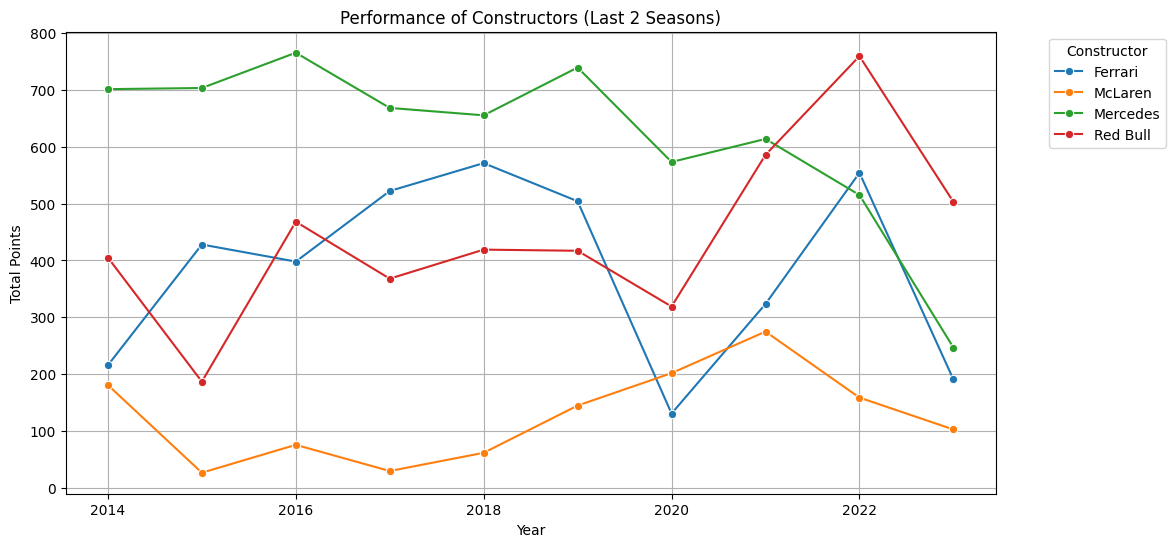

In [151]:
# Plotting the recent performance of constructors
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='points', hue='name_x', data=recent_constructor_performance, marker='o')
plt.title('Performance of Constructors (Last 2 Seasons)')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()

- Mercedes has been performing consistantly for over a decade
- Ferrari performnce has been inconcsistant over th eyears
- Redbull picked up performance from the year 2020